# Insurance Premium Prediction
## <span style='color:red'>Author: Muhammad Hasnain [Kaggle](https://www.kaggle.com/hasnainkhan0123)</span>


## About Dataset
### Context
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

### Acknowledgements
Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

### Inspiration
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

### About this file

Add Suggestion
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

### Importing all libraries required for Data Analysis

In [13]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Importing the dataSet

In [14]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Checking the Short summary of the dataSet

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Checking the description of the dataSet

In [16]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Checking for duplicate rows

In [17]:
# Check for duplicate rows in the entire DataFrame
def check_duplicated(df):
    duplicate_rows = df.duplicated()

    # Count the number of duplicate rows
    num_duplicates = duplicate_rows.sum()

    if num_duplicates == 0:
        print("There are no duplicate rows in the DataFrame.")
    else:
        print(f"There are {num_duplicates} duplicate rows in the DataFrame.")

### Checking the shape of the dataSet

In [18]:
df.shape

(1338, 7)

In [19]:
df.drop(df[df.duplicated()].index, inplace = True)

In [20]:
df.shape

(1337, 7)

### Checking the distribution of the dataSet

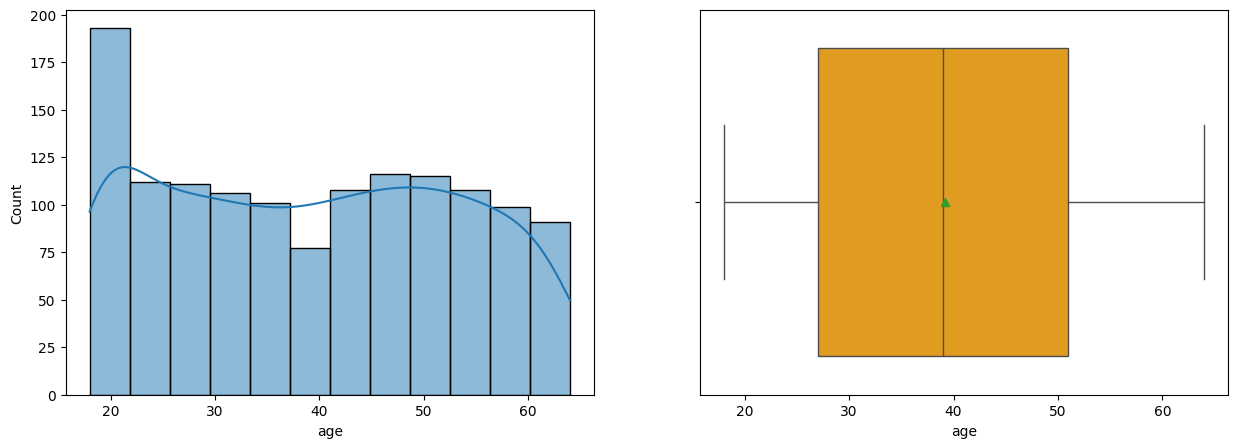

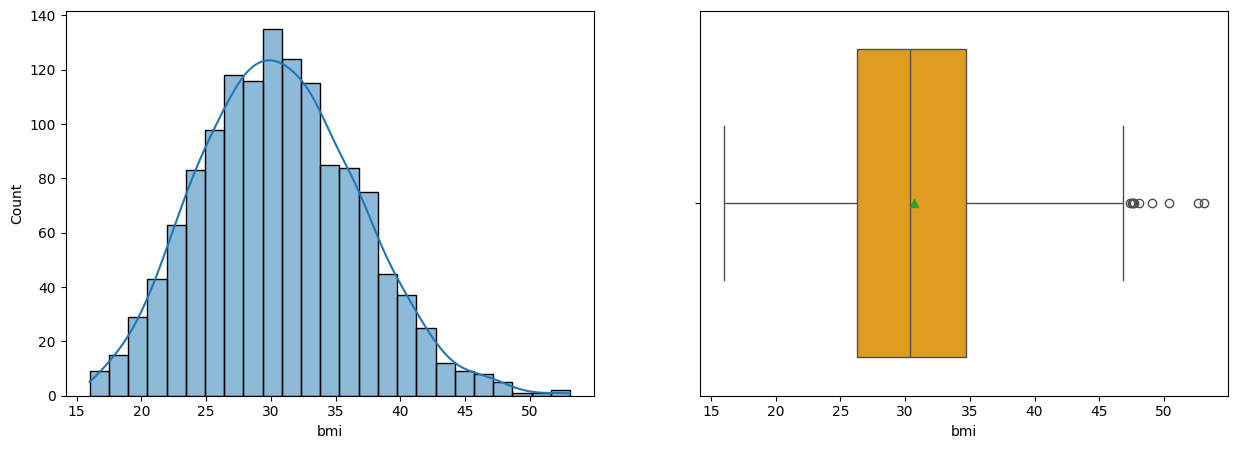

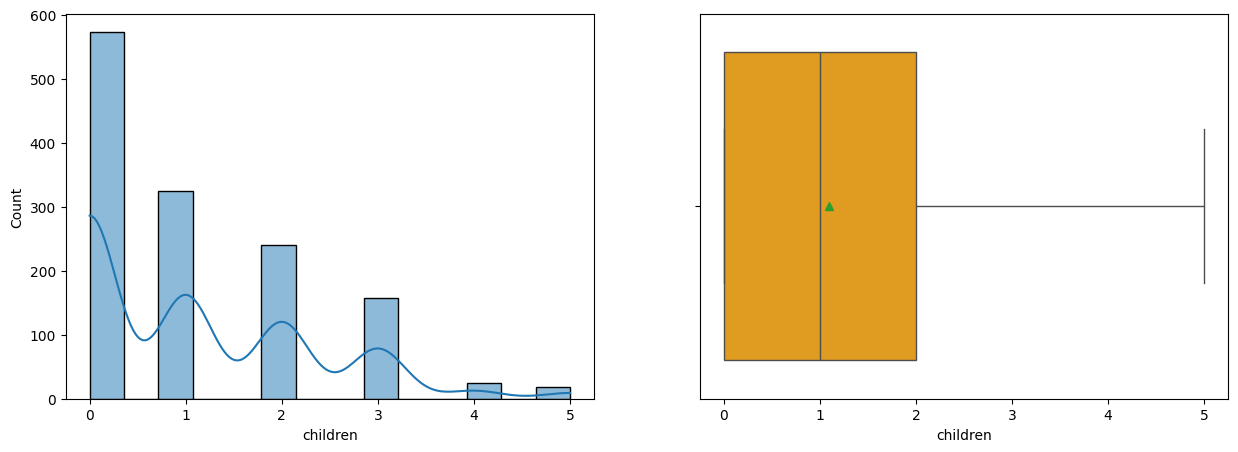

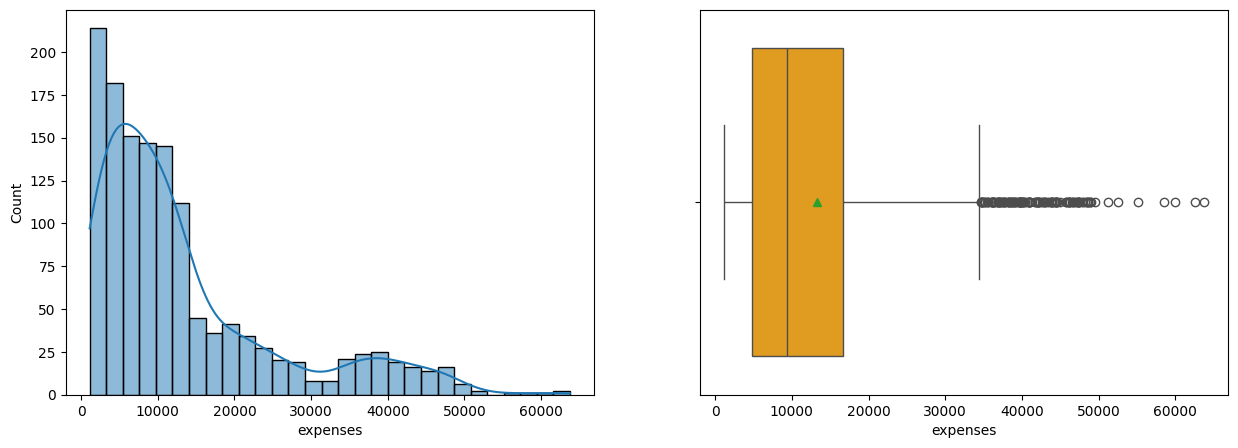

In [21]:
columns = ['age', 'bmi', 'children', 'expenses']
for col in columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[col], ax=ax[0], kde=True)
    sns.boxplot(df[col], ax=ax[1], orient='h', showmeans=True, color='orange')
    plt.show()

-----

### PLotting categorical columns

In [24]:
categorical_col = [i for i in df.columns if df[i].dtype == 'object']

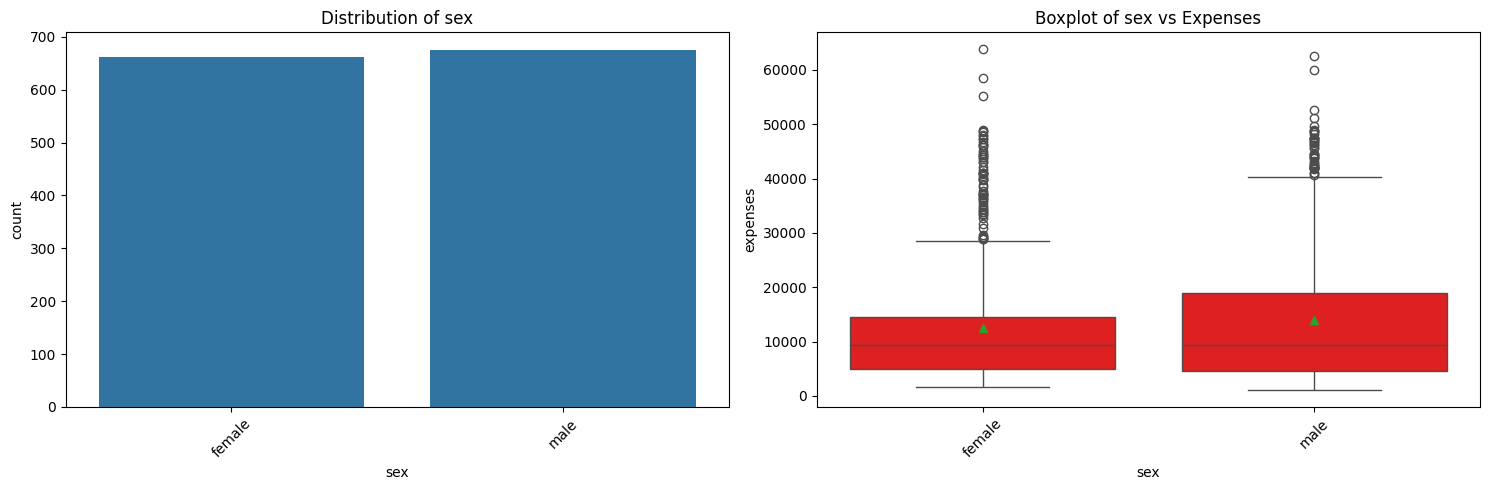

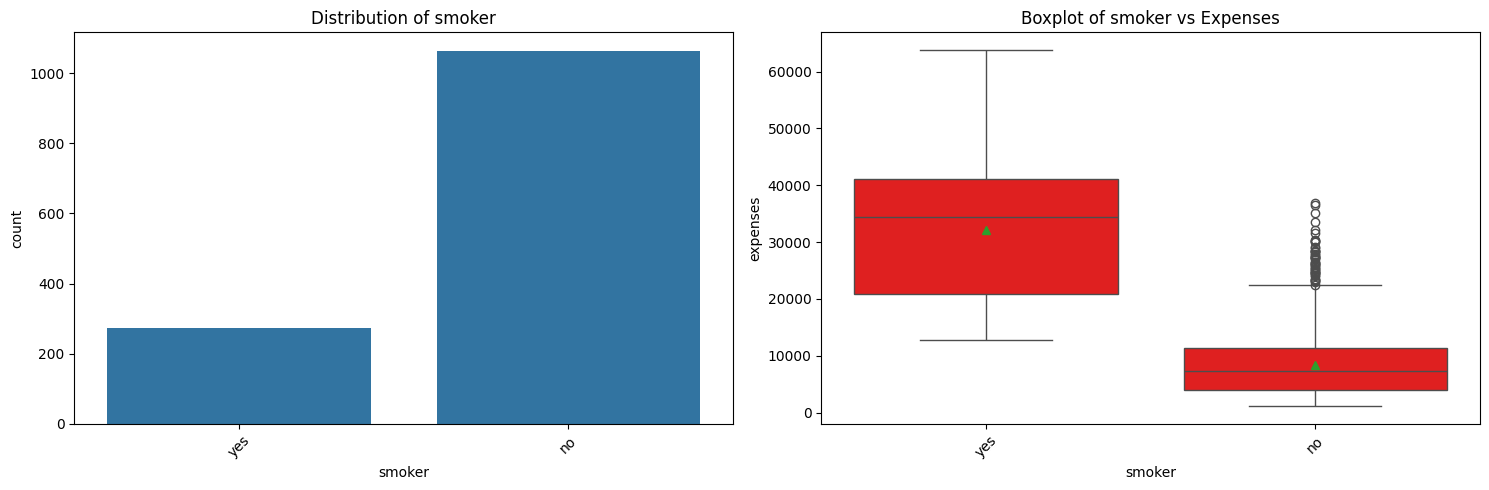

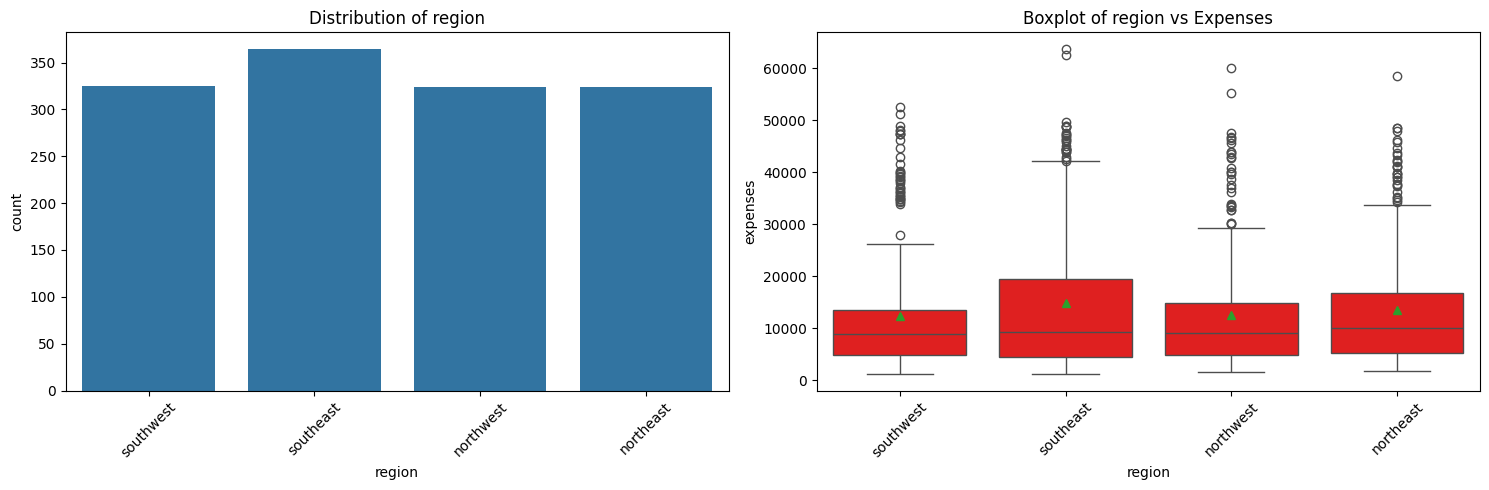

In [27]:
categorical_columns = categorical_col

for col in categorical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot (bar plot) for distribution
    sns.countplot(x=col, data=df, ax=ax[0])
    ax[0].set_title(f"Distribution of {col}")
    
    # Optional: Rotate x-axis labels for better readability
    ax[0].tick_params(axis='x', rotation=45)
    
    # Box plot for categorical variables
    sns.boxplot(x=col, y='expenses', data=df, ax=ax[1], showmeans=True, color='red')
    ax[1].set_title(f'Boxplot of {col} vs Expenses')
    
    # Optional: Rotate x-axis labels for better readability
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

----

### Handling the Categorical Columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [29]:
df['sex'] = df['sex'].map({
    'female': 0,
    'male': 1
})
df['smoker'] =df['smoker'].map({
    'no': 0,
    'yes': 1
})

df['region'] = df['region'].map({
    'northeast': 0,
    'northwest': 1,
    'southeast': 2,
    'southwest': 3
})

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


----

### Create a Scatter plot to check the relationship between the features and the target 

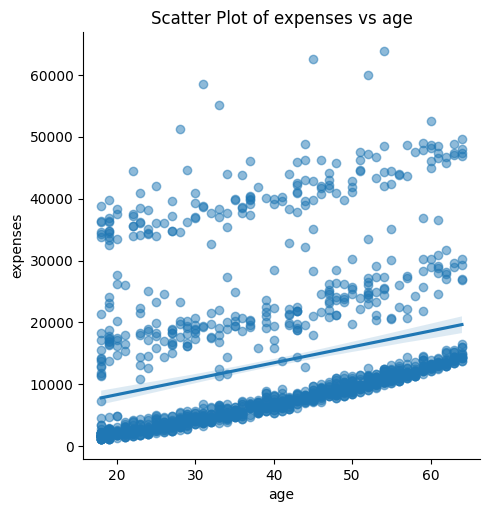

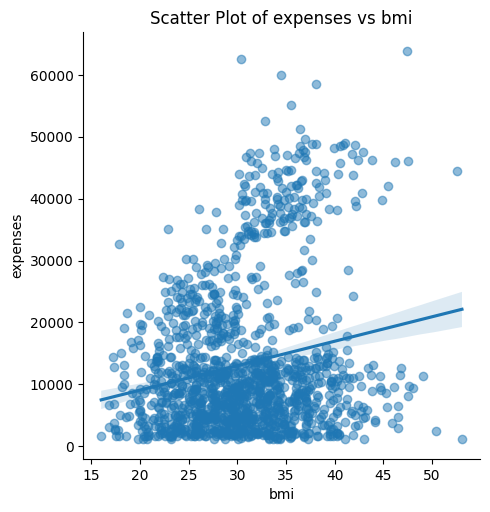

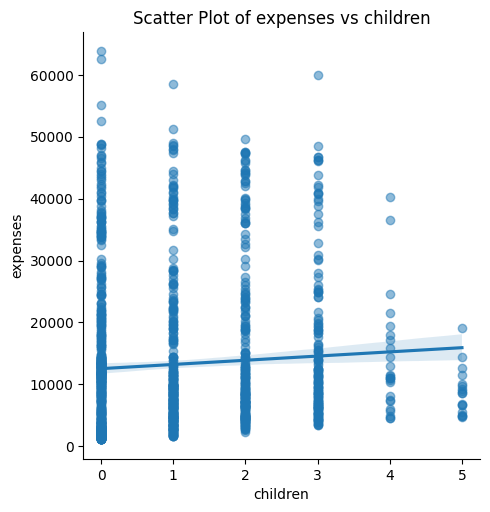

In [37]:
## Creating a scatter plot to check the linear trend of the data
# List of numerical columns (excluding the target column)
numerical_columns = ['age', 'bmi', 'children']

# Target column
target_column = 'expenses'

# Create scatter plots for each numerical column
for col in numerical_columns:
    sns.lmplot(x=col, y=target_column, data=df, scatter_kws={'alpha':0.5})
    plt.title(f'Scatter Plot of {target_column} vs {col}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.show()

### Modelling

### Importing the important libraries for Machine Learning

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Creating a function which dill take dataFrame, column, model, target variable

In [33]:
def fit_model(model, data, target):
    """This Function will take the model, data and target and fit the model. And as a result It will give the final evaluation metrics score.

    Args:
        model (_type_): model to fit on data
        data (_type_): data on which model to fit
        target (_type_): target variable
    """
    X = data.drop([target], axis=1)
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    ## Evaluating the model
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print(f"MSE: {MSE},\n RMSE: {RMSE},\n R2: {R2},\n MAE: {MAE}")
    

In [34]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [38]:
fit_model(model, df, 'expenses')

MSE: 21558321.620675813,
 RMSE: 4643.093970691936,
 R2: 0.8826796753077588,
 MAE: 2574.313332089551


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
X = df.drop(['expenses'], axis=1)
y = df['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Create a base RandomForestRegressor model
rf = RandomForestRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the RandomForestRegressor model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions
predictions = best_rf.predict(X_test)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
## Evaluate the model
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

R2 Score: 0.8829369898445825
Mean Squared Error: 21511038.513021015
Mean Absolute Error: 2728.1938150631513


In [45]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of boosting rounds
    'max_depth': [3, 6, 9],             # Maximum tree depth for base learners
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],       # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],# Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],          # L1 regularization term on weights
    'reg_lambda': [1, 2, 5]              # L2 regularization term on weights
}

# Create a base XGBRegressor model
xgb = XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBRegressor model with the best hyperparameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

# Make predictions
predictions = best_xgb.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
CPU times: total: 1.16 s
Wall time: 19 s


In [46]:
## Evaluate the model
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

R2 Score: 0.8976280911492905
Mean Squared Error: 18811459.49532187
Mean Absolute Error: 2609.761528174557


### Saving the model through pickle

In [50]:
import pickle
pickle.dump(best_rf, open('rf_model.pkl', 'wb'))

### Saving the model through joblib

In [67]:
import joblib
joblib.dump(best_xgb, 'XGB_model.joblib')

['XGB_model.joblib']